# Flight Price Prediction

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on

    Time of purchase patterns (making sure last-minute purchases are expensive)

    Keeping the flight as full as they want it (raising prices on a flight which is filling up in    order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.



Feature Description:

Airline_Names : This shows the list of all the Airline Names for which the data got scraped

Departure_Time : In this column we have the timings of every flight departure

Arrival_Time : Here in this column we have the timings of every flight arrival

Flight_Duration : We can see the total duration of a flight that it took to fly from the source to the destination

Source_Place : Gives us the name of the source place where the flight journey began

Destination_Place : Shows us the name of the destination place where the flight journey ended

Number_Of_Stops : Lists the number of stops the flight is going to take to complete the entire journey

Flight_Prices : Finally we have our label column that has the ticket prices for the aircraft journey

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')



# Load Dataset

In [2]:
df=pd.read_csv("Flight_Price_Data.csv")
df.head()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
0,Air Asia,12:40,20:15,7h 35m,New Delhi,Mumbai,1 Stop,"5,953"
1,Air Asia,11:55,20:15,8h 20m,New Delhi,Mumbai,1 Stop,"5,953"
2,Air Asia,16:15,06:20,14h 05m,New Delhi,Mumbai,1 Stop,"5,953"
3,Go First,18:50,20:45,1h 55m,New Delhi,Mumbai,Non Stop,"5,954"
4,Go First,09:05,11:05,2h 00m,New Delhi,Mumbai,Non Stop,"5,954"


In the above dataset, we can see the target variable as Flight price column which is a continous variable making this a regression problem

# EDA

In [3]:
df.head(10)

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
0,Air Asia,12:40,20:15,7h 35m,New Delhi,Mumbai,1 Stop,"5,953"
1,Air Asia,11:55,20:15,8h 20m,New Delhi,Mumbai,1 Stop,"5,953"
2,Air Asia,16:15,06:20,14h 05m,New Delhi,Mumbai,1 Stop,"5,953"
3,Go First,18:50,20:45,1h 55m,New Delhi,Mumbai,Non Stop,"5,954"
4,Go First,09:05,11:05,2h 00m,New Delhi,Mumbai,Non Stop,"5,954"
5,Go First,06:15,08:20,2h 05m,New Delhi,Mumbai,Non Stop,"5,954"
6,Go First,14:20,16:25,2h 05m,New Delhi,Mumbai,Non Stop,"5,954"
7,Go First,20:30,22:35,2h 05m,New Delhi,Mumbai,Non Stop,"5,954"
8,Go First,22:45,01:00,2h 15m,New Delhi,Mumbai,Non Stop,"5,954"
9,Go First,17:45,22:25,4h 40m,New Delhi,Mumbai,1 Stop,"5,954"


In [4]:
df.shape

(5590, 8)

In [5]:
df.columns

Index(['Airline_Names', 'Departure_Time', 'Arrival_Time', 'Flight_Duration',
       'Source_Place', 'Destination_Place', 'Number_Of_Stops',
       'Flight_Prices'],
      dtype='object')

# Check for Null Values

In [6]:
df.isnull().sum()

Airline_Names        0
Departure_Time       0
Arrival_Time         0
Flight_Duration      0
Source_Place         0
Destination_Place    0
Number_Of_Stops      0
Flight_Prices        0
dtype: int64

<AxesSubplot:>

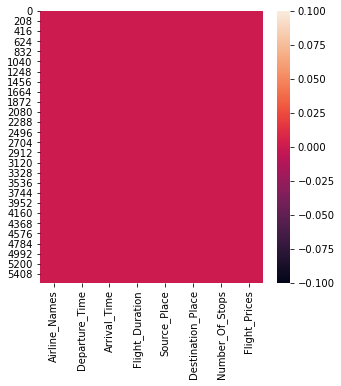

In [7]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

There are no missing values in our dataset, making it easier for futher processing.

In [8]:
print("Missing column values in percentage:")
for i in df:
    percentage = np.round((df[i].isnull().sum()/df.shape[0])*100, 6)
    print(i, ":".format(), percentage, '%')

Missing column values in percentage:
Airline_Names : 0.0 %
Departure_Time : 0.0 %
Arrival_Time : 0.0 %
Flight_Duration : 0.0 %
Source_Place : 0.0 %
Destination_Place : 0.0 %
Number_Of_Stops : 0.0 %
Flight_Prices : 0.0 %


This is to confirm that there are no missing values in our dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5590 entries, 0 to 5589
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline_Names      5590 non-null   object
 1   Departure_Time     5590 non-null   object
 2   Arrival_Time       5590 non-null   object
 3   Flight_Duration    5590 non-null   object
 4   Source_Place       5590 non-null   object
 5   Destination_Place  5590 non-null   object
 6   Number_Of_Stops    5590 non-null   object
 7   Flight_Prices      5590 non-null   object
dtypes: object(8)
memory usage: 349.5+ KB


With df.info() we shall see the presence of non null columns and dtypes of the columns

# To Find Unique Values

In [10]:
df.nunique().sort_values()

Number_Of_Stops         5
Airline_Names           6
Source_Place            9
Destination_Place       9
Departure_Time        223
Arrival_Time          232
Flight_Duration       407
Flight_Prices        1524
dtype: int64

With nunique() we can see the number of unique values present in each dataset.

# Data Preprocessing

In [11]:
#Number_Of_Stops
df['Number_Of_Stops'].value_counts()

1 Stop       3582
2 Stop(s)    1081
Non Stop      689
3 Stop(s)     222
4 Stop(s)      16
Name: Number_Of_Stops, dtype: int64

In [12]:
df.Number_Of_Stops.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2, "3 Stop(s)": 3, "4 Stop(s)": 4}, 
                           inplace = True)
df["Number_Of_Stops"].value_counts()

1    3582
2    1081
0     689
3     222
4      16
Name: Number_Of_Stops, dtype: int64

In [13]:
#Departure_Time

df["Departure_Time"] = df["Departure_Time"].str.replace(':', '.')
df["Departure_Time"]  = df["Departure_Time"].astype(float)
df.head()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
0,Air Asia,12.40,20:15,7h 35m,New Delhi,Mumbai,1,"5,953"
1,Air Asia,11.55,20:15,8h 20m,New Delhi,Mumbai,1,"5,953"
2,Air Asia,16.15,06:20,14h 05m,New Delhi,Mumbai,1,"5,953"
3,Go First,18.50,20:45,1h 55m,New Delhi,Mumbai,0,"5,954"
4,Go First,9.05,11:05,2h 00m,New Delhi,Mumbai,0,"5,954"


In [14]:
#Arrival_Time

df["Arrival_Time"] = df["Arrival_Time"].str.replace(':', '.')
df["Arrival_Time"]  = df["Arrival_Time"].astype(float)
df.head()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
0,Air Asia,12.40,20.15,7h 35m,New Delhi,Mumbai,1,"5,953"
1,Air Asia,11.55,20.15,8h 20m,New Delhi,Mumbai,1,"5,953"
2,Air Asia,16.15,6.20,14h 05m,New Delhi,Mumbai,1,"5,953"
3,Go First,18.50,20.45,1h 55m,New Delhi,Mumbai,0,"5,954"
4,Go First,9.05,11.05,2h 00m,New Delhi,Mumbai,0,"5,954"


We have converted the object data type of Departure time and Arrival Time to Numeric datatype.

In [15]:
#Flight Duration

df["Flight_Duration"]= df["Flight_Duration"].str.replace('h ', '.')
df["Flight_Duration"]= df["Flight_Duration"].str.replace('m', '')
df["Flight_Duration"]= df["Flight_Duration"].astype(float)
df.head()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
0,Air Asia,12.40,20.15,7.35,New Delhi,Mumbai,1,"5,953"
1,Air Asia,11.55,20.15,8.20,New Delhi,Mumbai,1,"5,953"
2,Air Asia,16.15,6.20,14.05,New Delhi,Mumbai,1,"5,953"
3,Go First,18.50,20.45,1.55,New Delhi,Mumbai,0,"5,954"
4,Go First,9.05,11.05,2.00,New Delhi,Mumbai,0,"5,954"


In [16]:
# Flight_Prices

df['Flight_Prices'] = df['Flight_Prices'].str.replace(',','')
df['Flight_Prices'] = df['Flight_Prices'].astype('float')
df.head()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
0,Air Asia,12.40,20.15,7.35,New Delhi,Mumbai,1,5953.0
1,Air Asia,11.55,20.15,8.20,New Delhi,Mumbai,1,5953.0
2,Air Asia,16.15,6.20,14.05,New Delhi,Mumbai,1,5953.0
3,Go First,18.50,20.45,1.55,New Delhi,Mumbai,0,5954.0
4,Go First,9.05,11.05,2.00,New Delhi,Mumbai,0,5954.0


In [17]:
df.dtypes

Airline_Names         object
Departure_Time       float64
Arrival_Time         float64
Flight_Duration      float64
Source_Place          object
Destination_Place     object
Number_Of_Stops        int64
Flight_Prices        float64
dtype: object

We have the data type values of all our columns after the conversion and we will be using encoding methods to deal with the remaining object data type column values later.

# Visualization

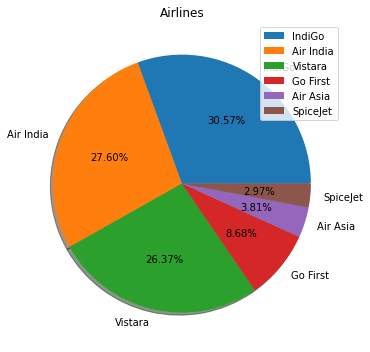

In [18]:
plt.figure(figsize=(10,5))
plt.pie(df['Airline_Names'].value_counts(), labels=df['Airline_Names'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('Airlines')
plt.tight_layout()
plt.show()

Observation:

    *Indigo is the highest number of airline preferred by people covering 30.57% of the total data.
    *We can see that Air India is the close competitor standing at the second position holding 27.6% of the total record.
    *At third place we have Vistara airlines that covers 26.37% of total data


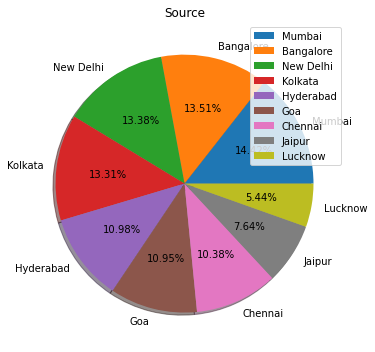

In [19]:
plt.figure(figsize=(10,5))
plt.pie(df['Source_Place'].value_counts(), labels=df['Source_Place'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('Source')
plt.tight_layout()
plt.show()

Observation:

    *Mumbai is the city most flights take off from covering 14.42% records.
    *We have "Bangalore" as close to second wherein it covers 13.51% records in the column
    *The least travel from location is "Lucknow" where it covers 5.44% of record in the column

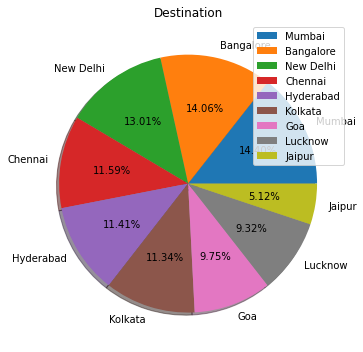

In [20]:
plt.figure(figsize=(10,5))
plt.pie(df['Destination_Place'].value_counts(), labels=df['Destination_Place'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('Destination')
plt.tight_layout()
plt.show()

Observation:

    *Even with destination place people prefer to fly towards the city "Mumbai" covering 14.87% of           record
    *Again in a similar fashion "Bangalore" city is a close second destination that people like to fly  towards covering 14.08% record in the column
    *"Jaipur" city records least chose destination by people with our data.

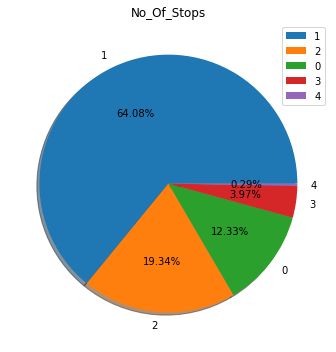

In [21]:
plt.figure(figsize=(10,5))
plt.pie(df['Number_Of_Stops'].value_counts(), labels=df['Number_Of_Stops'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('No_Of_Stops')
plt.tight_layout()
plt.show()

Observation:

    *1 stop layover tickets are more covering 64.08% rows in the column
    *Next in line are 2 stop layovers which cover 19.34% rows
    *Here we can see that the 0 stop flights availability is around 12.33% of the total record.
    *In domestic flight we rarely see 3 or 4 stop layovers and therefore they cover 4.2% and 0.31% of  total rows in the column respectively

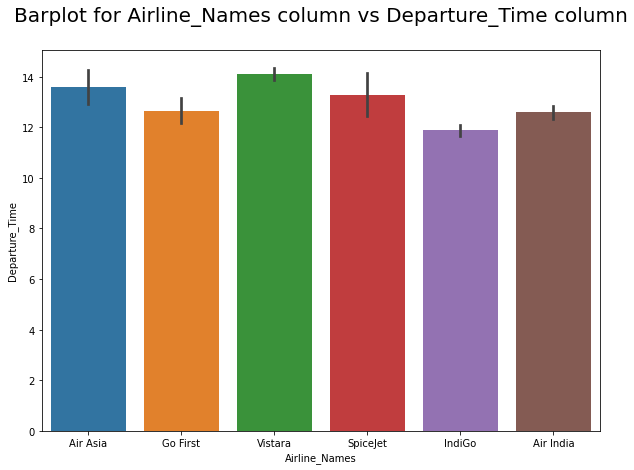

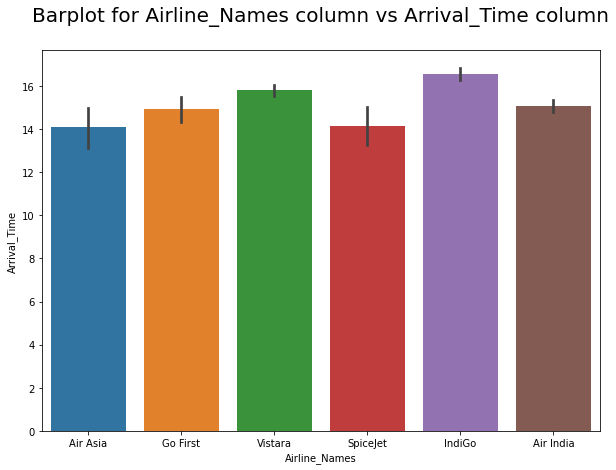

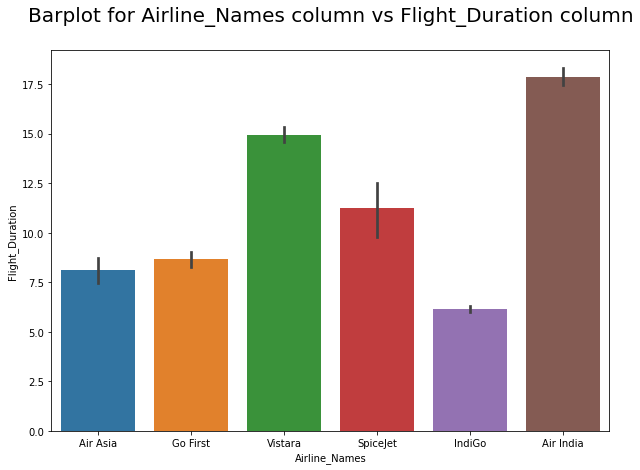

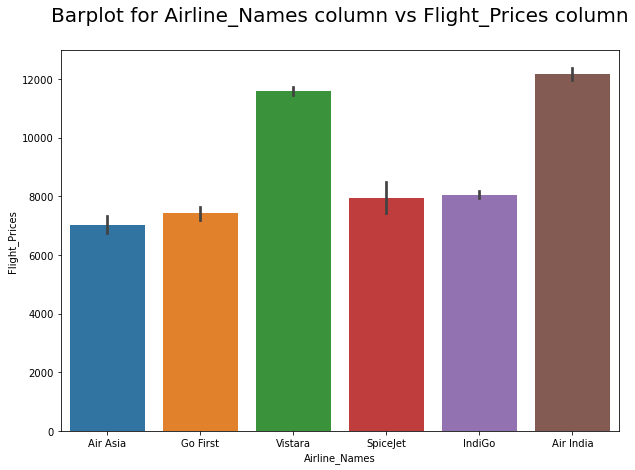

In [22]:
x = 'Airline_Names'

y = 'Departure_Time'
plt.figure(figsize=[10,7])
sns.barplot(x,y,data=df)
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

y = 'Arrival_Time'
plt.figure(figsize=[10,7])
sns.barplot(x,y,data=df)
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

y = 'Flight_Duration'
plt.figure(figsize=[10,7])
sns.barplot(x,y,data=df)
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

y = 'Flight_Prices'
plt.figure(figsize=[10,7])
sns.barplot(x,y,data=df)
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

Observation:

    *When we observe the barplot for Departure time vs Airline we can see that Air Asia has the highest departure time while IndiGo has the lowest departure time
    *Considering the barplot for Arrival time vs Airline we can see that IndiGo has the highest arrival time while Air Asia and SpiceJet have the lowest arrival time
    *With Flight duration vs Airline we observe that Air India has the highest flight duration while Indigo has the lowest duration flights collectively
    *Comparing the barplots for Flight prices vs Airline we can clearly see that Vistara and Air India have very high flight prices while the other airlines IndiGo, SpiceJet, Go First and Air Asia lie in a similar price bracket where Air Asia has the lowest fare

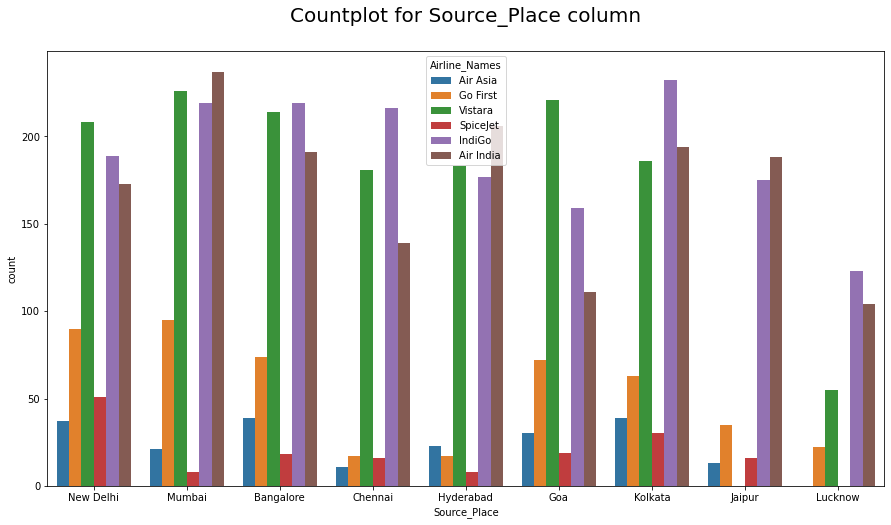

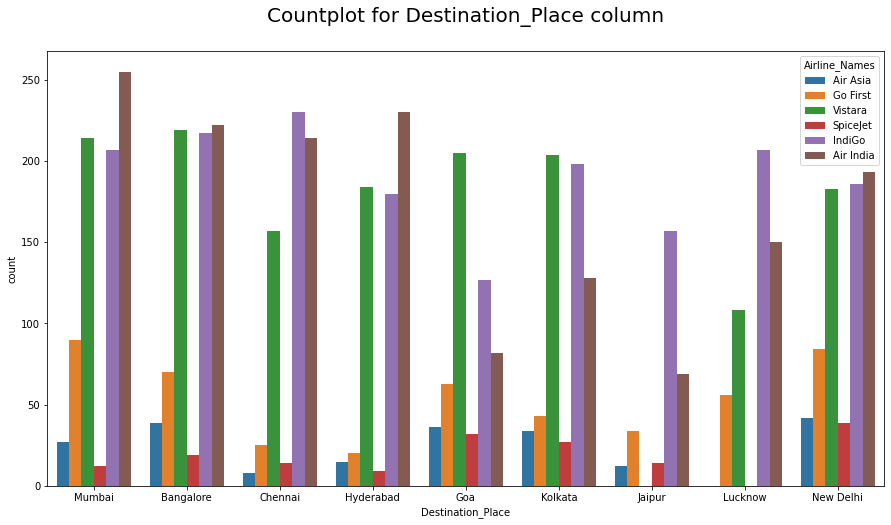

In [23]:
x = "Source_Place"
plt.figure(figsize=(15,8))
sns.countplot(x = x, hue = "Airline_Names", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

x = "Destination_Place"
plt.figure(figsize=(15,8))
sns.countplot(x = x, hue = "Airline_Names", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

Observation:

*we can see that Mumbai city has the highest number of departure flights for Air India airlines

*Go First, Indigo and Air India are the airlines that are used in almost all the cities to depart.

*With destination place details for all airlines we can see that Hyderabad city has the highest number of arrival flights for Air India airlines

*Here also we can observe that Go First, Indigo and Air India are the leading airlines that are used in almost all cities to arrive.

*Air India and Indigo flights do quite well and can be used for arrival and departure to and from any location in India.


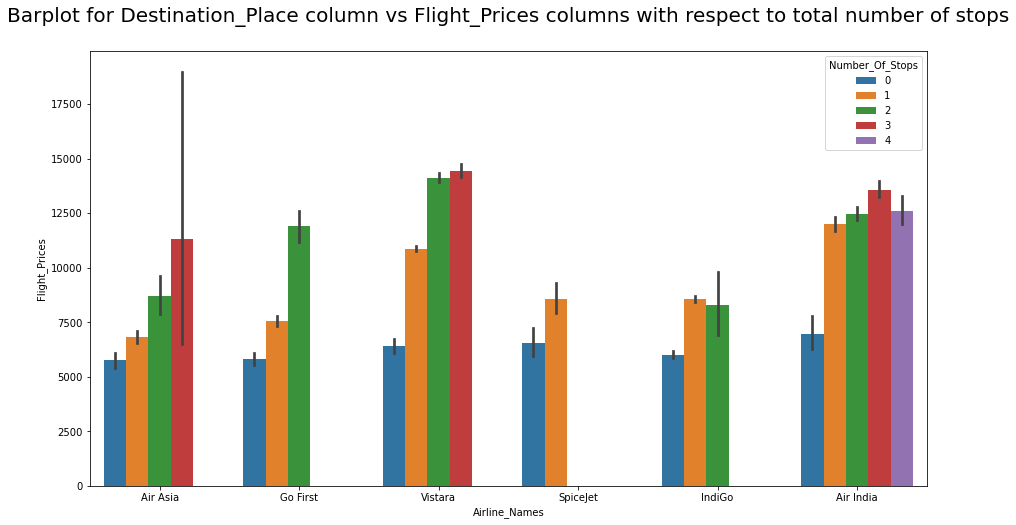

In [24]:
plt.figure(figsize=(15,8))
sns.barplot( x=df['Airline_Names'], y=df['Flight_Prices'], hue=df['Number_Of_Stops'])
plt.title(f"Barplot for {x} column vs {y} columns with respect to total number of stops\n", fontsize = 20)
plt.show()

Observation

*Non stop flights or  direct flights for every airline is cheaper when compared to 1 or more layovers.

*Also flights with 2 and 3 stops have a considerably high price and number of flights available in those records are also high.

*only Air India provides flights with 4 stop layover even in a domestic environment

*SpiceJet on the other hand only has flights available with 0 and 1 stop layovers

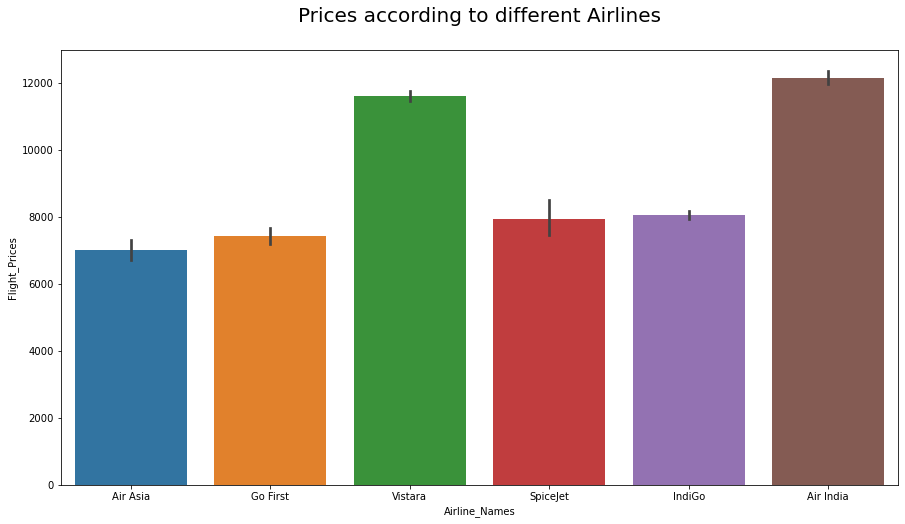

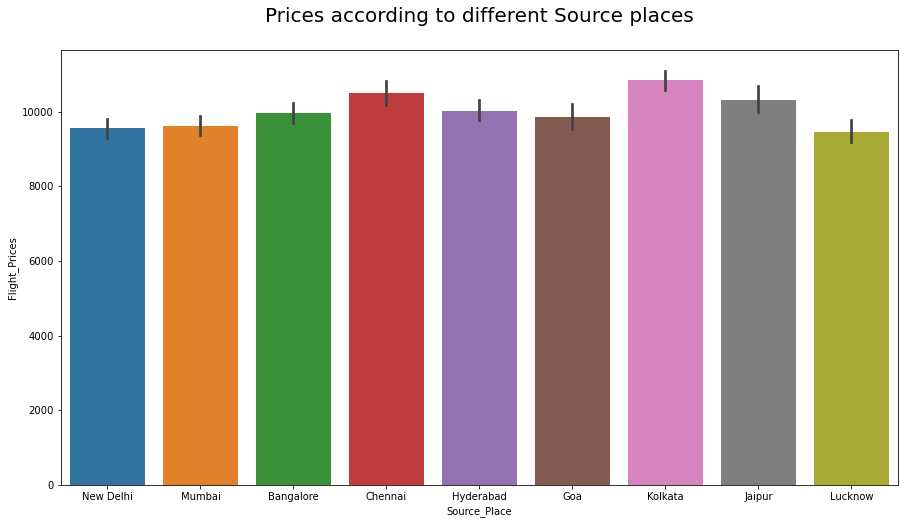

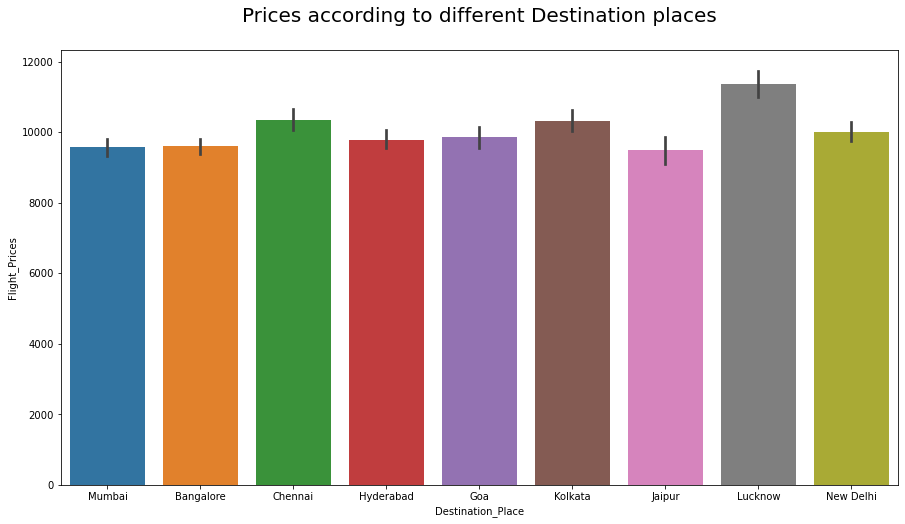

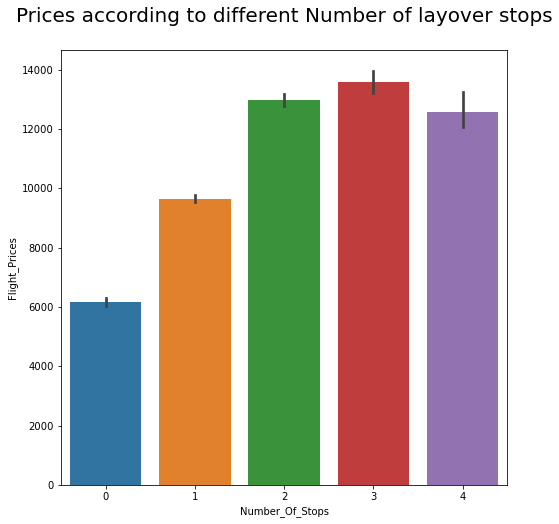

In [25]:
y = "Flight_Prices"

x = "Airline_Names"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Airlines\n", fontsize = 20)
plt.show()

x = "Source_Place"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Source places\n", fontsize = 20)
plt.show()

x = "Destination_Place"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Destination places\n", fontsize = 20)
plt.show()

x = "Number_Of_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Number of layover stops\n", fontsize = 20)
plt.show()



Observation:

*Airfares in Vistara and Air India are pretty high when compared to other airlines.

*Flight prices when departing from and arriving to cities like Kolkata and Chennai have higher price range 

*Consider the layovers for pricing situtation then obviously direct flights are cheaper when compared to flights that have 1 or more stops

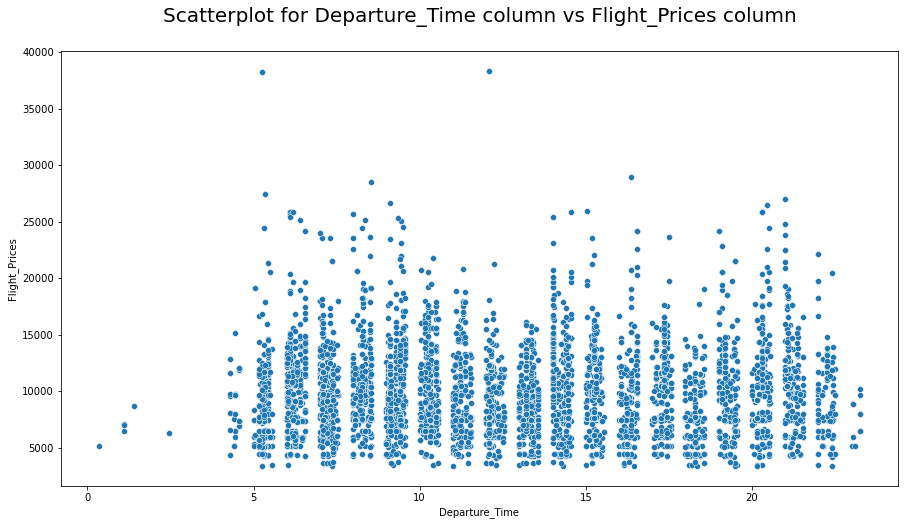

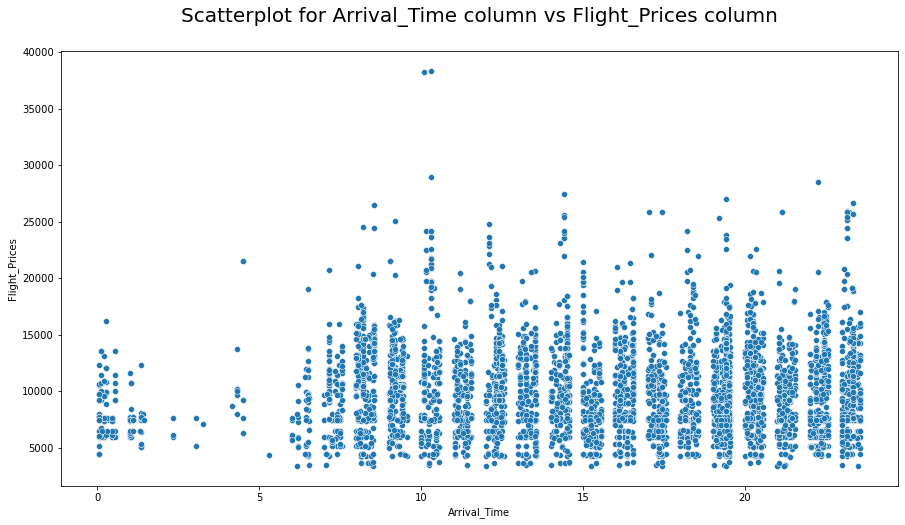

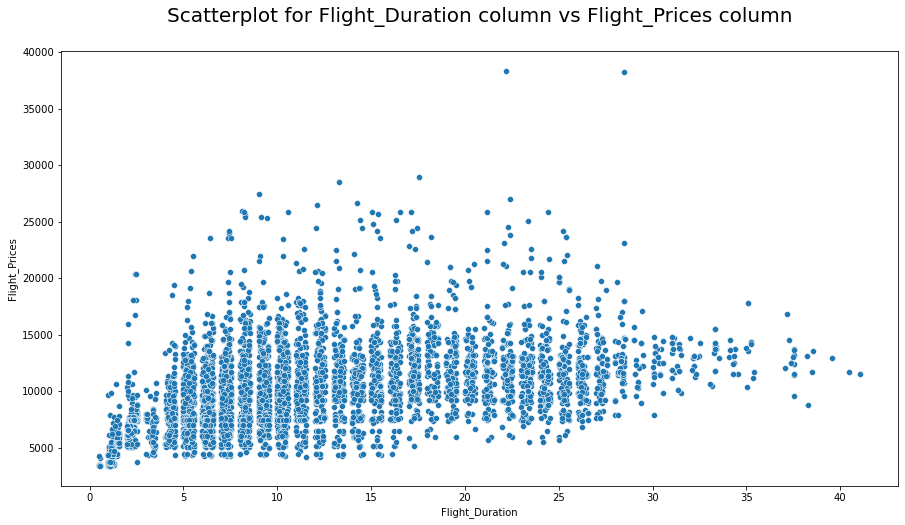

In [26]:
y = "Flight_Prices"

x = "Departure_Time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = "Arrival_Time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = "Flight_Duration"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()


Observation:

*In the above scatter plot we see the flight prices are the highest during peak hours as compared to other timings for departure

*We can see a similar trend in flight price scatter plot details when it comes to arrival timings where we see a decrease in prices between 1:00 hrs and 6:00 hrs

*Finally as the overall flight duration increases the flight prices increase too 

# Encoding the categorical object datatype columns

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
LE= LabelEncoder()

In [29]:
col= ["Airline_Names", "Source_Place", "Destination_Place"]

In [30]:
for i in col:
    df[i]= LE.fit_transform(df[i])

In [31]:
df.head()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
0,0,12.40,20.15,7.35,8,7,1,5953.0
1,0,11.55,20.15,8.20,8,7,1,5953.0
2,0,16.15,6.20,14.05,8,7,1,5953.0
3,2,18.50,20.45,1.55,8,7,0,5954.0
4,2,9.05,11.05,2.00,8,7,0,5954.0


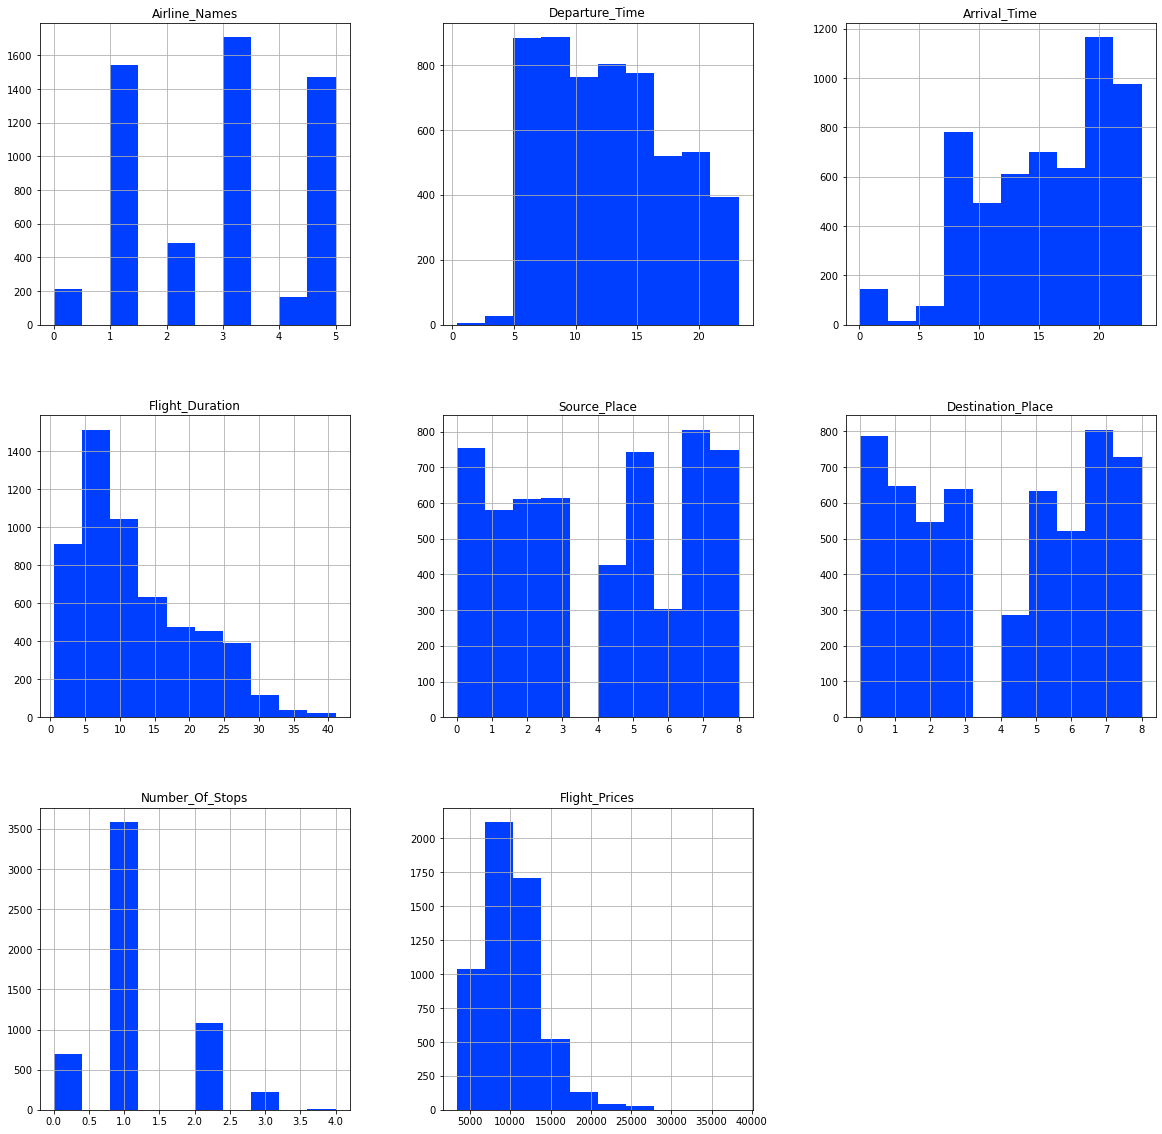

In [32]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

we are able to see the data distribution for our dataset with this histogram.

In [33]:
df.describe()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
count,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000
mean,2.803936,12.831655,15.639535,12.151708,4.029338,4.032737,1.158140,10025.038104
std,1.606321,4.914688,5.521618,8.114999,2.726227,2.767776,0.690166,3659.765160
min,0.000000,0.350000,0.050000,0.500000,0.000000,0.000000,0.000000,3361.000000
25%,1.000000,8.550000,11.350000,6.150000,2.000000,1.000000,1.000000,7426.000000
50%,3.000000,12.450000,16.400000,10.100000,4.000000,4.000000,1.000000,9721.000000
75%,5.000000,16.550000,20.250000,17.350000,7.000000,7.000000,1.000000,12214.000000
max,5.000000,23.250000,23.550000,41.050000,8.000000,8.000000,4.000000,38348.000000


The dataset seems to have outliers and skewness present in it. We shall handle it with proper processes

# To find Correlation

In [34]:
df.corr()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
Airline_Names,1.000000,0.094091,0.066464,-0.072462,-0.036030,-0.024956,-0.157627,0.027401
Departure_Time,0.094091,1.000000,-0.052377,0.078795,0.043301,-0.024032,-0.031620,0.014429
Arrival_Time,0.066464,-0.052377,1.000000,-0.092256,-0.041867,0.033581,0.040150,0.013683
Flight_Duration,-0.072462,0.078795,-0.092256,1.000000,-0.049700,-0.051603,0.650222,0.480417
Source_Place,-0.036030,0.043301,-0.041867,-0.049700,1.000000,-0.213348,-0.052390,-0.046113
Destination_Place,-0.024956,-0.024032,0.033581,-0.051603,-0.213348,1.000000,-0.027719,0.025659
Number_Of_Stops,-0.157627,-0.031620,0.040150,0.650222,-0.052390,-0.027719,1.000000,0.534739
Flight_Prices,0.027401,0.014429,0.013683,0.480417,-0.046113,0.025659,0.534739,1.000000


<AxesSubplot:>

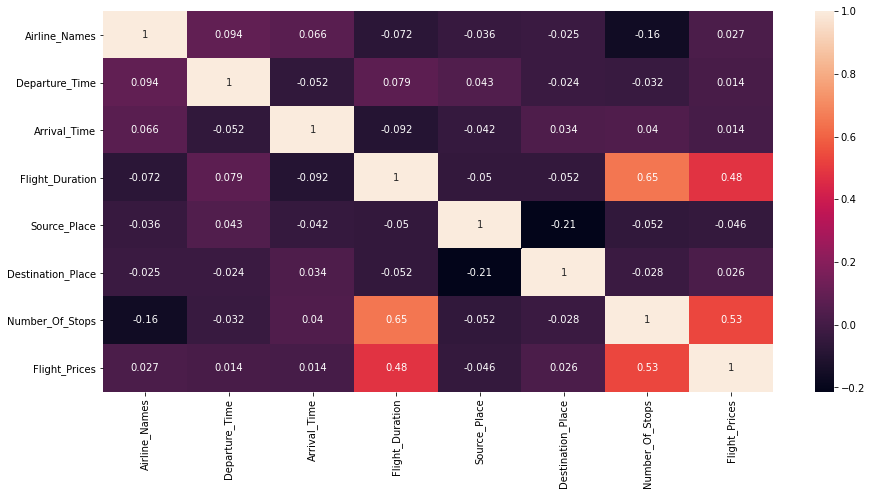

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

Flight Duration and Number_of_stops have good correlation with the target variable.

# Correlation Bar Plot comparing target column with the feature columns

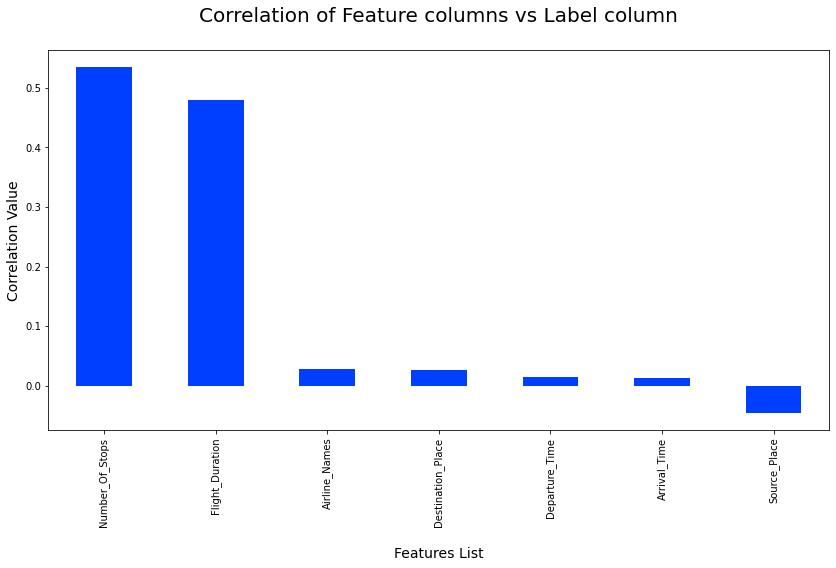

In [36]:
df_corr = df.corr()
plt.figure(figsize=(14,7))
df_corr['Flight_Prices'].sort_values(ascending=False).drop('Flight_Prices').plot.bar()
plt.title("Correlation of Feature columns vs Label column\n", fontsize=20)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

we have seen the positively and negatively correlated feature columns with our target variable.

# Check For Skewness

In [37]:
df.skew().sort_values(ascending=True)

Arrival_Time        -0.543176
Destination_Place   -0.033244
Source_Place        -0.002970
Airline_Names        0.082159
Departure_Time       0.223309
Number_Of_Stops      0.715898
Flight_Duration      0.760322
Flight_Prices        1.076039
dtype: float64

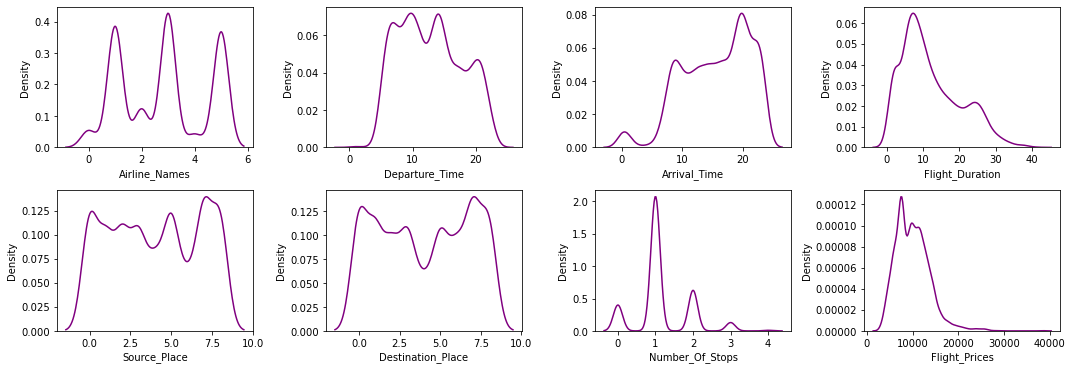

In [38]:
plt.figure(figsize=(15,15))
for i in range (0, len(df.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(df[df.columns[i]], color = "purple")
    plt.tight_layout()

We see that our target column is the one showing the highest skewness and it won't be much of a concern to us. However there is slight skewness in our feature columns that will need to be treated.

In [39]:
df1=df.drop('Flight_Prices', axis=1)

In [40]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [41]:
df1['Flight_Prices']= df['Flight_Prices']

# Check For Outliers

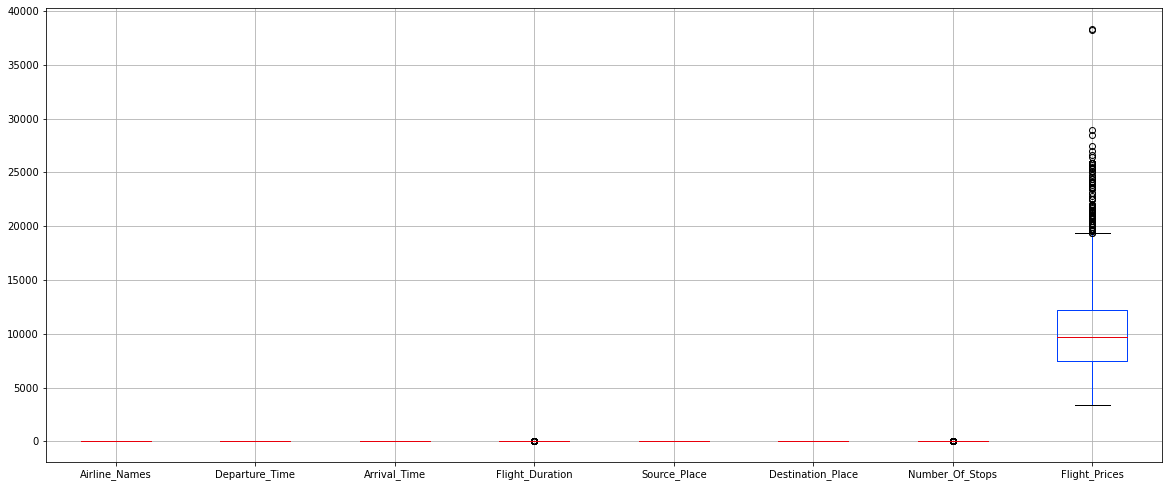

In [42]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There are outliers present in certain columns, so we shall handle it with zscore

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.74571982, 0.08783738, 0.81694685, ..., 1.07217066, 0.22915305,
        1.11274964],
       [1.74571982, 0.2608038 , 0.81694685, ..., 1.07217066, 0.22915305,
        1.11274964],
       [1.74571982, 0.67524975, 1.70971244, ..., 1.07217066, 0.22915305,
        1.11274964],
       ...,
       [0.12206896, 1.37999826, 0.11583418, ..., 0.37316219, 0.22915305,
        0.03444193],
       [1.12312356, 0.50228333, 0.7407069 , ..., 0.37316219, 1.219903  ,
        0.07486448],
       [1.12312356, 0.50228333, 0.7988346 , ..., 0.37316219, 2.66895905,
        0.18963621]])

In [44]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold=3
print(np.where(z>3))

(array([ 376,  377,  378,  462,  463,  697,  698,  699,  719,  744,  745,
        746,  747,  998, 1014, 1015, 1116, 1210, 1211, 1289, 1290, 1291,
       1292, 1454, 1506, 1530, 1531, 1545, 1661, 1662, 1692, 1693, 1967,
       2060, 2173, 2174, 2175, 2274, 2280, 2281, 2284, 2284, 2371, 2394,
       2395, 2396, 2397, 2472, 2629, 2703, 2766, 2781, 2782, 2988, 3073,
       3388, 3389, 3390, 3472, 3473, 3498, 3609, 3610, 3648, 3687, 4004,
       4005, 4006, 4007, 4112, 4113, 4114, 4239, 4240, 4241, 4242, 4322,
       4449, 4541, 4565, 4566, 4624, 4756, 4854, 4855, 4856, 4857, 4858,
       4921, 4927, 4941, 5002, 5013, 5123, 5124, 5133, 5141, 5189, 5192,
       5219, 5238, 5239, 5262, 5285, 5313, 5380], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 3, 3, 3, 3, 3, 7, 7, 3, 7, 7, 7, 7, 3, 3, 3, 3, 6, 3, 7,
       7, 7, 7, 3, 3, 7, 3, 7, 7, 7, 6, 7, 7, 7, 3, 3, 3, 7, 7, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 7, 7, 6, 7, 7

In [45]:
df_new= df1[(z<3).all(axis=1)]

In [46]:
df_new.shape

(5485, 8)

In [47]:
df.shape

(5590, 8)

In [48]:
loss_percent= (5590-5485)/5590*100
loss_percent

1.8783542039355994

Only 2% of the data is lost with outliers, so we shall proceed with model training

In [49]:
df1= pd.DataFrame(df_new, columns= df.columns)

# Spliting the data

In [50]:
x= df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

The target variable is of continous type, so we shall use regression models.

# Scaling Of Features

In [51]:
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops
0,-1.769727,-0.094477,0.820566,-0.580287,1.455557,1.076046,-0.211074
1,-1.769727,-0.267808,0.820566,-0.473092,1.455557,1.076046,-0.211074
2,-1.769727,0.670218,-1.704280,0.264659,1.455557,1.076046,-0.211074
3,-0.521565,1.149428,0.874864,-1.311733,1.455557,1.076046,-1.703006
4,-0.521565,-0.777606,-0.826466,-1.254983,1.455557,1.076046,-1.703006


# Train the Model

In [52]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# Check the best Random State

# Linear Regression

In [53]:
maxr2=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    R2=r2_score(ytest,predlr)
    if R2>maxr2:
        maxr2=R2
        maxRS=i
print("Best R2_score is", maxr2, 'on Random_state',maxRS)

Best R2_score is 0.700249748056704 on Random_state 14


# To Find the Best Cross Validation Score

In [54]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [55]:
train_accuracy= r2_score(ytrain,pred_tr)
test_accuracy= r2_score(ytest,pred_ts)

In [56]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.3769185991903837 and accuracy score for training is 0.3970778041909919 and the accuracy for testing is 0.6063931304175213


At cross fold 3 the cv score is 0.381955255366141 and accuracy score for training is 0.3970778041909919 and the accuracy for testing is 0.6063931304175213


At cross fold 4 the cv score is 0.3781757109908159 and accuracy score for training is 0.3970778041909919 and the accuracy for testing is 0.6063931304175213


At cross fold 5 the cv score is 0.3832346792141769 and accuracy score for training is 0.3970778041909919 and the accuracy for testing is 0.6063931304175213


At cross fold 6 the cv score is 0.37944874271854045 and accuracy score for training is 0.3970778041909919 and the accuracy for testing is 0.6063931304175213


At cross fold 7 the cv score is 0.3769564926802213 and accuracy score for training is 0.3970778041909919 and the accuracy for testing is 0.6063931304175213


At cross fold 8 the cv score is 0.36342616580075693 

Random_state= 14, CV score is best with cv=3. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=14)

In [58]:
#Linear Regression

lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('R2=', r2_score(ytest,predlr))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predlr)))
print('MAE=', mean_absolute_error(ytest,predlr))

R2= 0.700249748056704
RMSE= 1980.0460338661057
MAE= 1530.1785121097741


In [59]:
cv_score=cross_val_score(lr,x,y, cv=9)
print('Cross Validation Score of LinearRegression is:', cv_score.mean())

Cross Validation Score of LinearRegression is: 0.36861159350165024


In [60]:
diff= 0.7002- 0.3686
diff

0.33160000000000006

In [61]:
# Ridge Regression

rd=Ridge(alpha=1e-2, normalize=True)
rd.fit(xtrain,ytrain)
predrd= rd.predict(xtest)
print('R2=', r2_score(ytest,predrd))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predrd)))
print('MBE=', mean_absolute_error(ytest,predrd))

R2= 0.6981509169957438
RMSE= 1986.9660161210882
MBE= 1535.7834483772745


In [62]:
cv_score=cross_val_score(rd,x,y, cv=3)
print('Cross Validation Score of RidgeRegression is:', cv_score.mean())

Cross Validation Score of RidgeRegression is: 0.3819940245501088


In [63]:
diff= 0.6981- 0.3819
diff

0.31620000000000004

In [64]:
# Lasso Regression

ls=Lasso(alpha=1e-2, normalize=True)
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('R2=', r2_score(ytest,predls))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predls)))
print('MBE=', mean_absolute_error(ytest,predls))

R2= 0.7002799938729967
RMSE= 1979.946134668344
MBE= 1529.9010356624033


In [65]:
cv_score=cross_val_score(ls,x,y, cv=3)
print('Cross Validation Score of LassoRegression is:', cv_score.mean())

Cross Validation Score of LassoRegression is: 0.3819956251502809


In [66]:
diff=0.7002-0.3819
diff

0.3183

In [67]:
# Decision Tree Regressor

dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,preddtc)))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 0.9952399896233683
root_mean_squared_error 995.4495278516133
mean_absolute_error: 412.475
r2_score: 0.9243786548417828


In [68]:
cv_score=cross_val_score(dtc,x,y, cv=3)
print('Cross Validation Score of DecisionTreeRegressor is:', cv_score.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.1807411163169349


In [69]:
diff= 0.9281-0.1595
diff

0.7686000000000001

In [70]:
# Random Forest Regressor

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 839.6729978291256
mean_absolute_error: 555.7557297619047
Rf Score 0.9561691345753598
r2_score: 0.9315224800722613


In [71]:
cv_score=cross_val_score(rf,x,y, cv=9)
print('Cross Validation Score of RandomForestRegressor is:', cv_score.mean())

Cross Validation Score of RandomForestRegressor is: 0.4779509777418409


In [72]:
diff= 0.9321-0.49
diff

0.44210000000000005

In [73]:
#SVR

svc=SVR()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predsvc)))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

root mean_squared_error 3496.4114226797237
mean_absolute_error: 2868.0215981462416
Score: 0.05738509758455945
r2_score: -405.03013453901525


In [74]:
# K Neighbors Regressor

knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predknn)))
print('mean_absolute_error:', mean_absolute_error(predknn,ytest))
print('Rf Score', knn.score(xtrain,ytrain))
print('r2_score:', r2_score(predknn,ytest))

root mean_squared_error 1329.4154903565702
mean_absolute_error: 1020.7699999999998
Rf Score 0.6969447537678526
r2_score: 0.7728495943588491


In [75]:
cv_score=cross_val_score(knn,x,y, cv=9)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: 0.3348967325475714


In [76]:
diff=0.7728-0.3348
diff

0.43800000000000006

Even though the diff between r2 and cv score is high, we shall take RandomForestRegressor for tuning Hyper Parameters.

# HyperParameter Tuning With GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
RandomForestRegressor()

RandomForestRegressor()

In [79]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["squared_error","absolute_error","poisson"],
            'max_depth':[3,4,5,6],
            'min_samples_split': [2,3,4,5]}

In [80]:
GCV= GridSearchCV(RandomForestRegressor(), parameters, cv=9, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [81]:
GCV.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=5)

In [82]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.8734015563552786

In [92]:
#Final Model
flrf=RandomForestRegressor(max_depth=6, 
                         min_samples_split=5,
                         min_samples_leaf=3,
                         max_features= 'auto',
                         criterion = 'absolute_error')
flrf.fit(xtrain,ytrain)
predrf= flrf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 1240.0281350079322
mean_absolute_error: 934.2547499999997
Rf Score 0.9561691345753598
r2_score: 0.8258410175287032


After Tuning for Hyper Parameter the accuracy has improved to 83% without underfitting or overfitting. So we shall save the model.

# Save The Model

In [93]:
import pickle
filename= 'Flight_Price.pkl'
pickle.dump(flrf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [94]:
x=np.array(ytest)
predicted= np.array(flrf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,5943.0,5963.710
1,8362.0,11350.735
2,10843.0,12287.280
3,9201.0,9790.630
4,11129.0,10797.200
5,3499.0,4439.775
6,14398.0,12842.665
7,6489.0,7627.975
8,17917.0,16066.330
9,5955.0,6001.200


After complete analysis of the dataset, we did all the processing of the dataset to make it clean and structured to train different models to get the desired output.

RandomforestRegressor gave good results with the r2 accuracy of 83%. 